### Extensión del modelo de regresión lineal a una dimensión arbitraria.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Generación de los datos del problema:

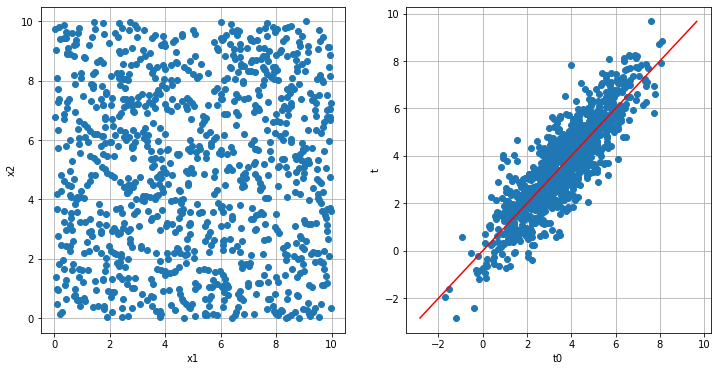

Error esperado = 948.885856


In [8]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(1, d)
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(n, d)*(xmax - xmin)
t0 = np.dot(x, w.T) + b 
t = t0 + np.random.randn(n, 1)*noise
tmin = np.min(t)
tmax = np.max(t)

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[:, 0], x[:, 1], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a t0:
plt.plot(t0, t, 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t0")
plt.ylabel("t")
plt.show()

# Error esperado:
e = np.sum((t-t0)*(t-t0))
print("Error esperado = %f" % e)

Forma de los vectores:

In [9]:
print(x.shape)
print(t.shape)

(1000, 5)
(1000, 1)


Modelo de regresión lineal con los parámetros inicializados al azar:

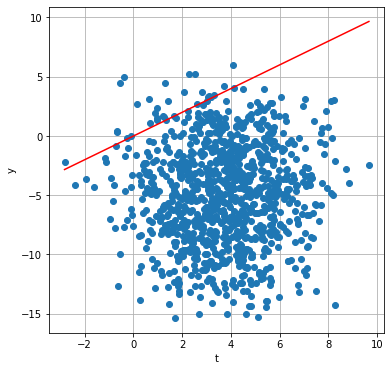

Error = 96012.066898


In [10]:
w = np.random.randn(1, d)
b = np.random.randn()

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = np.dot(x, w.T) + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t, y, 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))  
print("Error = %f" % e)

Entrenamiento del modelo:

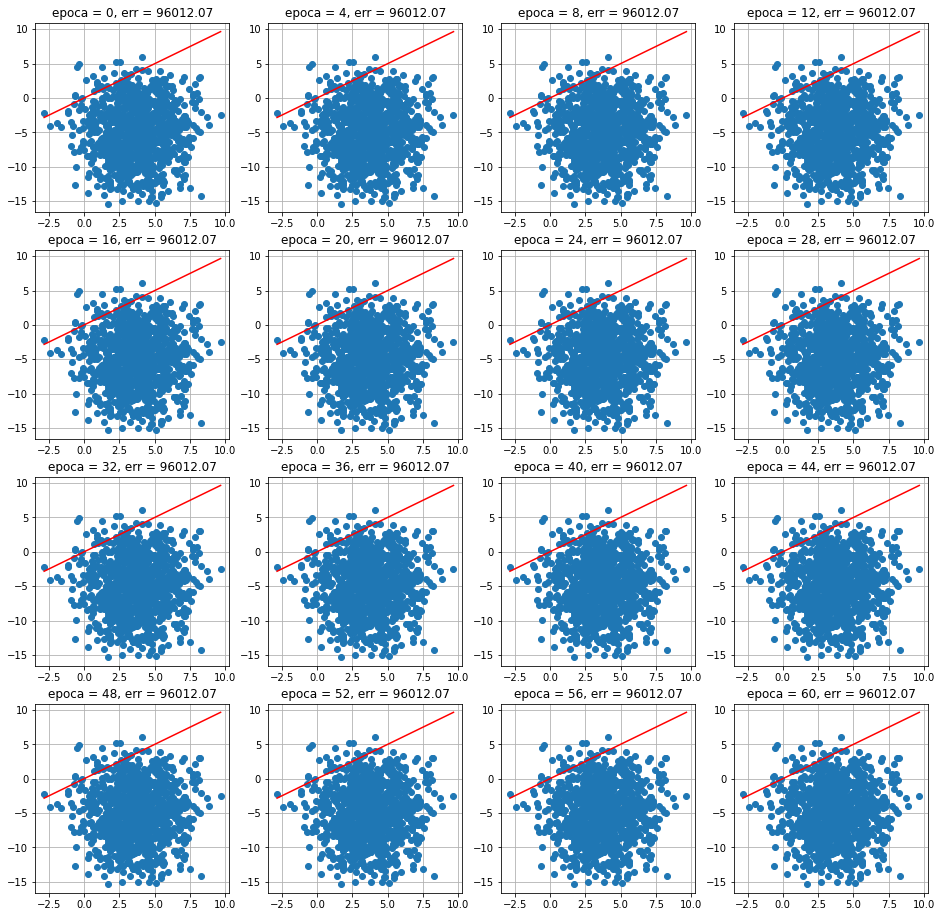

In [11]:
nepocas = 64
eta = 0.000005

plt.figure(figsize=(16,16))

k = 1
error = []
for epoch in range(nepocas):
    y = np.dot(x, w.T) + b
    
    #----------------------------------------------------------
    # TO-DO: Calcula el error:

    #----------------------------------------------------------

    if epoch%4 == 0:
        plt.subplot(4, 4, k)
        plt.plot(t, y, 'o')
        plt.plot([tmin, tmax], [tmin, tmax], 'r-')
        plt.grid(True)
        plt.title("epoca = %d, err = %.2f" % (epoch, e))
        k += 1
        
    #----------------------------------------------------------
    # TO-DO: Calcula los gradientes y actualiza los parametros:    

    #----------------------------------------------------------

plt.show()

Error frente a número de épocas: TO-DO!!!

ValueError: x and y must have same first dimension, but have shapes (64,) and (0,)

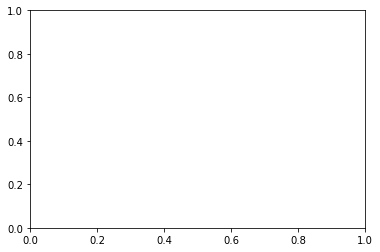

In [12]:
plt.plot(range(nepocas), error)
plt.grid(True)
plt.show()

### California Housing

In [13]:
from sklearn.datasets import fetch_california_housing

x, t = fetch_california_housing(return_X_y=True, as_frame=True)
print(x.shape)
print(t.shape)

(20640, 8)
(20640,)


Nos quedamos sólo con los primeros 1000 ejemplos para que las ejecuciones sean más rápidas.

In [14]:
x = x.values[:1000]
t = t.values[:1000]
t = t[:, None]

print(x.shape)
print(t.shape)

(1000, 8)
(1000, 1)


Estandarizamos:

In [15]:
# Estandarizar los datos:
from sklearn.preprocessing import scale 
x = scale(x, axis = 0)